# Project 2

# Predicting Scores on basis of hours studied through Linear Regression.
######
| **Prepared by:** | Rayyan Ahmed. 
|------------------|--------------------------------------------------------------------------------|
| **Date:**        | 29th May, 2024.                                                                |



###
## Preparing DataFrame:
###

In [1]:
import pandas as pd

data = {'Hours': [2.7, 4.8, 3.2, 5.5, 1.5, 3.8, 2.1, 4.2, 6.0, 3.5, 5.0, 2.0, 4.5, 3.0, 5.8, 6.3, 1.8, 2.5, 4.0, 3.7, 5.2, 4.1, 6.1, 3.3, 2.9], 'Scores': [30, 54, 35, 60, 20, 45, 28, 50, 65, 38, 55, 25, 52, 33, 58, 68, 22, 27, 49, 41, 53, 48, 66, 37, 31]}

df = pd.DataFrame(data)
df

,Hours,Scores
0,2.7,30
1,4.8,54
2,3.2,35
3,5.5,60
4,1.5,20
5,3.8,45
6,2.1,28
7,4.2,50
8,6.0,65
9,3.5,38


###
## Getting DataFrame's Infos:
###

In [2]:
df.head()
df.tail()
df.shape
df.isnull()
df.isnull().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


###
## Plotting DataFrame:
###

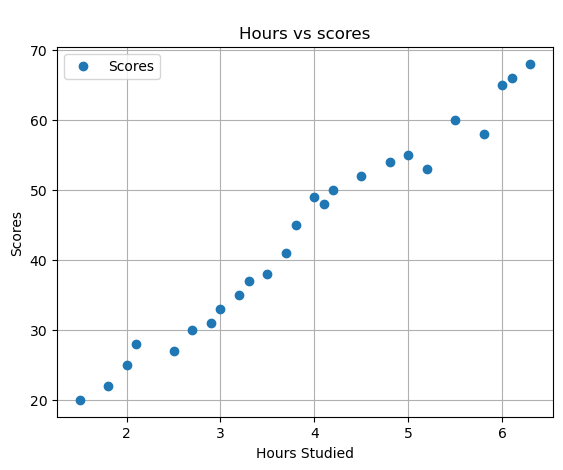

In [3]:
import matplotlib.pyplot as plt

df.plot( x = 'Hours', y = 'Scores', style = 'o')
plt.title('\nHours vs scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.grid()
plt.show()

###
## Ploting DataFrame's Bar Plot:
###

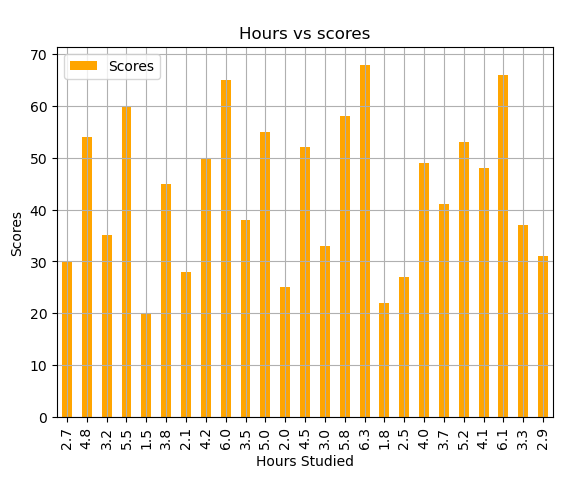

In [4]:
df.plot( x = 'Hours', y = 'Scores', kind = 'bar', style = 'o', color = 'orange')
plt.title('\nHours vs scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.grid()
plt.show()

from the above visualiazation we can clearly understand that as long the study hours increases the study scores also increases, it specifies that the independent feature hour and dependent feature score has a linear relationship.

###
## Seperating independent values (x) and dependent values (y):
###

In [5]:
x = df[['Hours']]
y = df['Scores']

##
## Train Test Split
##

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 0)

##
## Training Algorithm
##

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit( x_train, y_train )

print('Training Completed')

Training Completed


###
## Predicting values of unseen data (x_test):
###

In [8]:
regressor.predict(x_test)

array([42.59729869, 36.59266787, 41.59652688, 22.58186262, 24.58340623])

###
## DataFrame of Actual unseen values (y_test) and Predicted unseen values (regressor.predict(x_test)):
###

In [9]:
pd.DataFrame({'Actual Scores (y_test)': y_test, 'Predicted Scores (regressor.predict(x_test))': regressor.predict(x_test)})

,Actual Scores (y_test),Predicted Scores (regressor.predict(x_test))
5,45,42.597299
2,35,36.592668
19,41,41.596527
16,22,22.581863
11,25,24.583406


##
## visualising the train set result
##

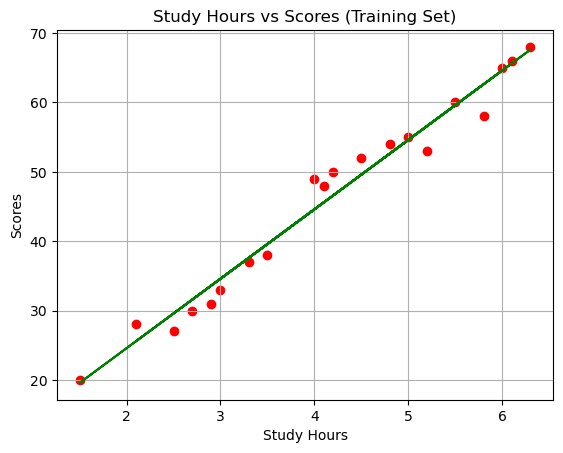

In [10]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'green')
plt.title('Study Hours vs Scores (Training Set)')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

##
## visualising the test set result
##

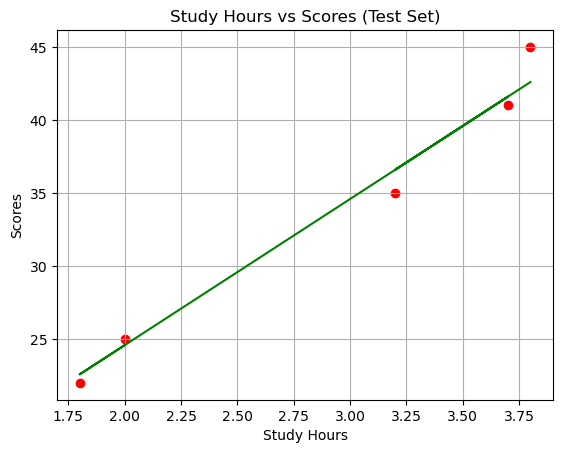

In [11]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'green')
plt.title('Study Hours vs Scores (Test Set)')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

##
### Q) What will be predicted score if a student studies for 9.25 hrs/ day?
##

In [13]:
ask = float(input('For how many hours you want to predict the score: '))
prediction = regressor.predict([[ask]])
prediction_ = float(prediction)
print(f'\nDetails:\nNo. of hours studied: {ask}')
print(f'Predicted Score according to {ask} hours: {prediction_:.3f}')

For how many hours you want to predict the score: 6

Details:
No. of hours studied: 6.0
Predicted Score according to 6.0 hours: 64.614


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##
## Evaluating the Model Performance:
##

In [14]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

print(f'R2:{r2_score(y_test,  regressor.predict(x_test))}')
print(f'Mean Absolute Error(MAE): {mean_absolute_error(y_test,  regressor.predict(x_test))}')
print(f'Mean Squared Error(MSE): {mean_squared_error(y_test,  regressor.predict(x_test))}')
print(f'Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test,  regressor.predict(x_test)))}')

R2:0.9767775219273866
Mean Absolute Error(MAE): 1.1180704913815291
Mean Squared Error(MSE): 1.8355046668593633
Root Mean Squared Error: 1.057388524328465


##
## Standardization :
## Let's try to improve our model :
##

###
## Importing StandardScale:
###

In [15]:
from sklearn.preprocessing import StandardScaler

###
## Standardizing the Orignal DataFrame (df):
###

In [16]:
df1 = df.copy()
scaler = StandardScaler()
df1_scaled_ = scaler.fit_transform(df1)
df1_scaled_

df1_scaled = pd.DataFrame(df1_scaled_, columns = ['Hours','Scores'])
df1_scaled

,Hours,Scores
0,-0.859955,-0.959748
1,0.644967,0.733925
2,-0.501641,-0.606899
3,1.146607,1.157343
4,-1.719911,-1.665444
5,-0.071663,0.098798
6,-1.289933,-1.100887
7,0.214989,0.451646
8,1.504922,1.510191
9,-0.286652,-0.395190


###
## Seperating independent values (x) and dependent values (y) from df1_scaled:
###

In [17]:
x1 = df1_scaled[['Hours']]
y1 = df1_scaled['Scores']

###
## train_test_split:
###

In [18]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

###
## Importing LinearRegression:
###

In [20]:
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression()
regressor1.fit( x1_train, y1_train )

LinearRegression()

###
## Predicting values of unseen data (x1_test):
###

In [21]:
regressor1.predict(x1_test)

array([-0.07076031, -0.49450518, -0.14138446, -1.48324322, -1.34199493])

###
## Actual unseen values (y1_test) and Predicted unseen values (regressor1.predict(x1_test)):
###

In [22]:
pd.DataFrame({'Actual Scores (y1_test)': y1_test, 'Predicted Scores (regressor1.predict(x1_test))': regressor1.predict(x1_test)})

,Actual Scores (y1_test),Predicted Scores (regressor1.predict(x1_test))
5,0.098798,-0.070760
2,-0.606899,-0.494505
19,-0.183481,-0.141384
16,-1.524305,-1.483243
11,-1.312596,-1.341995


###
## Evaluating Model Performance:
###

In [23]:
print(f'R2:{r2_score(y1_test, regressor1.predict(x1_test))}')
print(f'Mean Absolute Error(MAE): {mean_absolute_error(y1_test, regressor1.predict(x1_test))}')
print(f'Mean Squared Error(MSE): {mean_squared_error(y1_test, regressor1.predict(x1_test))}')
print(f'Root Mean Squared Error: {np.sqrt(mean_absolute_error(y1_test, regressor1.predict(x1_test)))}')

R2:0.9767775219273866
Mean Absolute Error(MAE): 0.07890187636624506
Mean Squared Error(MSE): 0.00914095949631156
Root Mean Squared Error: 0.2808947781042664


###
## Predicting Program:
###

In [26]:
ask = float(input('For how many hours you want to predict the score: '))
prediction = regressor1.predict([[ask]])
prediction_ = float(prediction)

Original_hour = ( ask * 1.395421) + 3.9                   
Original_score = ( prediction_ * 14.170391667134682) + 43.6 

print(f'\nDetails:\nNo. of hours studied: {ask}')
print(f'Predicted Score according to {ask} ({Original_hour:.3f}) hours: {prediction_:.3f} ({Original_score:.3f})')

For how many hours you want to predict the score: 0.788293

Details:
No. of hours studied: 0.788293
Predicted Score according to 0.788293 (5.000) hours: 0.777 (54.607)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###
## Final Comparision of Test Dataset:
###

In [27]:
pd.DataFrame({'Actual Scores': y_test, 'Predicted Score': regressor.predict(x_test), 'Actual Scores (standardized)': y1_test, 'Predicted Score (standardized)': regressor1.predict(x1_test)})

,Actual Scores,Predicted Score,Actual Scores (standardized),Predicted Score (standardized)
5,45,42.597299,0.098798,-0.070760
2,35,36.592668,-0.606899,-0.494505
19,41,41.596527,-0.183481,-0.141384
16,22,22.581863,-1.524305,-1.483243
11,25,24.583406,-1.312596,-1.341995


###
## Final Comparision of Train Dataset:
###

In [28]:
pd.DataFrame({'Actual Scores': y_train, 'Predicted Score': regressor.predict(x_train), 'Actual Scores (standardized)': y1_train, 'Predicted Score (standardized)': regressor1.predict(x1_train)})

,Actual Scores,Predicted Score,Actual Scores (standardized),Predicted Score (standardized)
22,66,65.615050,1.580761,1.553595
17,27,29.587265,-1.171457,-0.988874
24,31,33.590352,-0.889178,-0.706378
23,37,37.593440,-0.465760,-0.423881
14,58,62.612735,1.016203,1.341723
1,54,52.605017,0.733925,0.635481
10,55,54.606560,0.804494,0.776729
13,33,34.591124,-0.748039,-0.635753
8,65,64.614278,1.510191,1.482971
6,28,25.584178,-1.100887,-1.271371


###
## Final Comparision of Whole Dataset:
###

In [29]:
pd.DataFrame({'Actual Scores': y, 'Predicted Score': regressor.predict(x), 'Actual Scores (standardized)': y1, 'Predicted Score (standardized)': regressor1.predict(x1)})

,Actual Scores,Predicted Score,Actual Scores (standardized),Predicted Score (standardized)
0,30,31.588809,-0.959748,-0.847626
1,54,52.605017,0.733925,0.635481
2,35,36.592668,-0.606899,-0.494505
3,60,59.610419,1.157343,1.129850
4,20,19.579547,-1.665444,-1.695116
5,45,42.597299,0.098798,-0.070760
6,28,25.584178,-1.100887,-1.271371
7,50,46.600386,0.451646,0.211736
8,65,64.614278,1.510191,1.482971
9,38,39.594983,-0.395190,-0.282633
